### TAXI FARE IN NYC

SUP GRETE

toimetame oma andmeteaduse projektiga siin 

In [84]:
import pandas as pd

df = pd.read_csv('data.csv',low_memory=False)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
# store_and_fwd_flag oli ainuke täheline seega muutsin ära et kõik oleks numbri väljad
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

## different patterns


on näha et 17-19 on peak --> probably mingi evening rush hour (tööd ja koolid ja asjad saavad läbi)

samuti et kolmap, neljapäev ja reedel on suurima trip countiga, nv on pigem vähem isegi

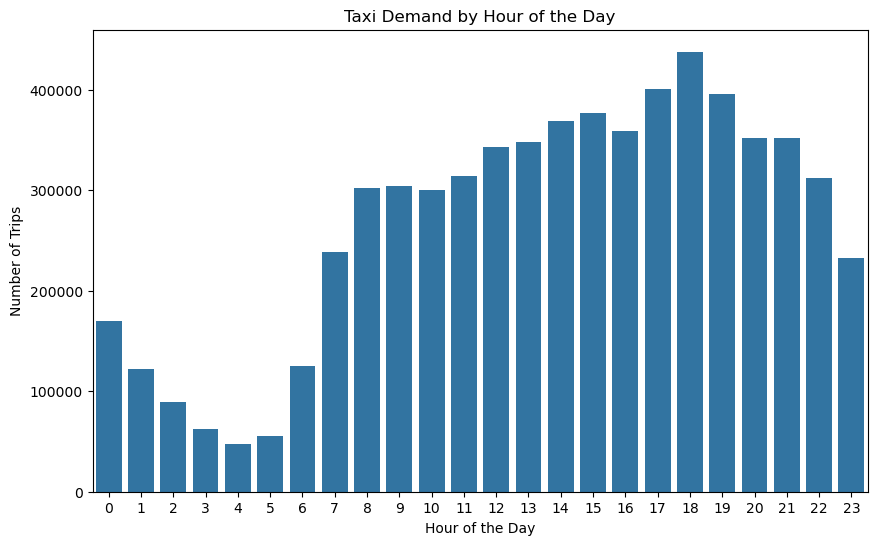

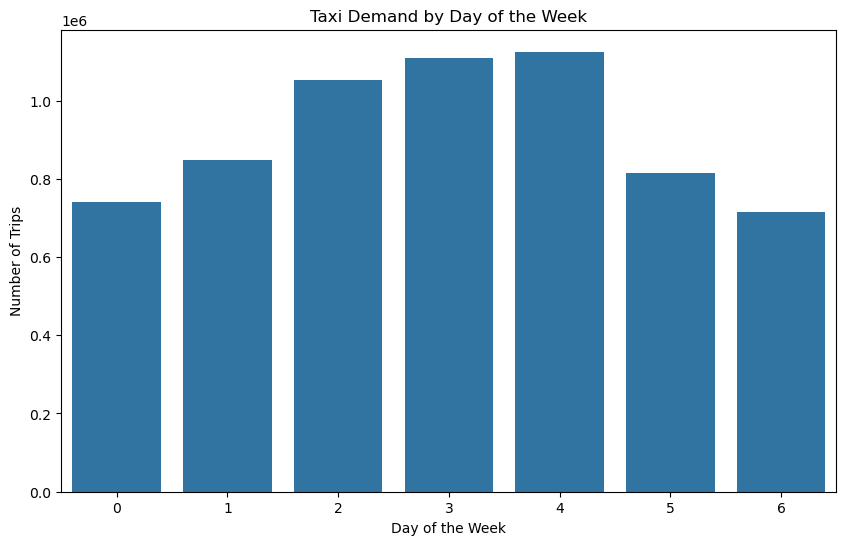

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # esmaspöev=0, pühapäev=6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Taxi Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot trips per day of the week (weekday demand)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day', data=df)
plt.title('Taxi Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [145]:
#POLE TEGELT VIST VAJA

#zone_lookup = pd.read_csv('taxi-zone-lookup.csv')

#df = df.merge(zone_lookup, how='left', left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
#df.rename(columns={'Zone': 'Pickup_Zone', 'Borough': 'Pickup_Borough'}, inplace=True)

#df.drop(['LocationID'], axis=1, inplace=True)

#df = df.merge(zone_lookup, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=('', '_dropoff'))
#df.rename(columns={'Zone': 'Dropoff_Zone', 'Borough': 'Dropoff_Borough'}, inplace=True)

#df.drop(['LocationID'], axis=1, inplace=True)
#df = df.drop(columns=[col for col in df.columns if col.endswith('_x') or col.endswith('_y')])

In [147]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Pickup_Borough,Pickup_Zone,Dropoff_Borough,Dropoff_Zone
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,0.5,1.47,0.0,0.3,11.27,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,0.5,1.50,0.0,0.3,12.30,2.5,Manhattan,Upper West Side South,Manhattan,Upper West Side North
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,0.5,1.00,0.0,0.3,10.80,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side North
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,0.5,1.36,0.0,0.3,8.16,0.0,Manhattan,Upper West Side North,Manhattan,Manhattan Valley
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,0.5,0.00,0.0,0.3,4.80,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood


lisasin koordinaadid (aga need praegu borough järgi -> peab veel mõtisklem kas meil zonede järgi hoopis vaja)

In [115]:
zone_lookup_borouch = pd.read_csv("taxi-zone-lookup.csv")

coordinates = {
    'Queens': (40.7282, -73.7949),
    'EWR': (40.6895, -74.1745),           
    'Bronx': (40.8448, -73.8648),
    'Manhattan': (40.7685, -73.9822),
    'Staten Island': (40.5795, -74.1502),
    'Brooklyn': (40.6782, -73.9442),
    'Unknown': (None, None)                
}


zone_lookup_borouch['Latitude'] = zone_lookup_borouch['Borough'].map(lambda x: coordinates.get(x, (None, None))[0])
zone_lookup_borouch['Longitude'] = zone_lookup_borouch['Borough'].map(lambda x: coordinates.get(x, (None, None))[1])

zone_lookup_borouch.head()

,LocationID,Borough,Zone,Latitude,Longitude
0,1,EWR,Newark Airport,40.6895,-74.1745
1,2,Queens,Jamaica Bay,40.7282,-73.7949
2,3,Bronx,Allerton/Pelham Gardens,40.8448,-73.8648
3,4,Manhattan,Alphabet City,40.7685,-73.9822
4,5,Staten Island,Arden Heights,40.5795,-74.1502


vaatasin millised on top10 pickup ja dropoff locationi zoned ning lisasin nende koordinaadid, et saaks mapile ilusti need kanda

In [137]:
import pandas as pd

zone_lookup_zones = pd.read_csv("taxi-zone-lookup.csv")

# zones in top10 pickups and dropoffs
location_coordinates = {
    237: (40.7736, -73.9566),
    161: (40.7543, -73.9821),
    236: (40.769, -73.966),
    162: (40.7571, -73.9719),
    186: (40.7505, -73.9935),
    230: (40.7580, -73.9855),
    132: (40.6446, -73.7797),
    170: (40.748, -73.978),
    48: (40.7638, -73.9918),
    142: (40.7742, -73.9849),

    239: (40.7870, -73.9754),
    141: (40.7390, -73.9981)
}

zone_lookup_zones['zone_lat'] = zone_lookup_zones['LocationID'].map(lambda x: location_coordinates.get(x, (None, None))[0])
zone_lookup_zones['zone_long'] = zone_lookup_zones['LocationID'].map(lambda x: location_coordinates.get(x, (None, None))[1])

print(zone_lookup_zones)

     LocationID        Borough                     Zone  zone_lat  zone_long
0             1            EWR           Newark Airport       NaN        NaN
1             2         Queens              Jamaica Bay       NaN        NaN
2             3          Bronx  Allerton/Pelham Gardens       NaN        NaN
3             4      Manhattan            Alphabet City       NaN        NaN
4             5  Staten Island            Arden Heights       NaN        NaN
..          ...            ...                      ...       ...        ...
260         261      Manhattan       World Trade Center       NaN        NaN
261         262      Manhattan           Yorkville East       NaN        NaN
262         263      Manhattan           Yorkville West       NaN        NaN
263         264        Unknown                  Unknown       NaN        NaN
264         265        Unknown                  Unknown       NaN        NaN

[265 rows x 5 columns]


In [126]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


MAP MILLES ON TOP10 PICKUP LOCATION ZONE JA TOP10 DROPOFF LOCATION ZONE

In [142]:
import pandas as pd
import folium
from collections import Counter
from matplotlib.patches import Patch

location_mapping = zone_lookup_zones.set_index('LocationID')[['zone_lat', 'zone_long']].dropna().to_dict('index')

pickup_counts = df['PULocationID'].value_counts().head(10)
dropoff_counts = df['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Locations (PULocationID):")
print(pickup_counts)
print("\nTop 10 Dropoff Locations (DOLocationID):")
print(dropoff_counts)

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

common_locations = set(pickup_counts.index) & set(dropoff_counts.index)

for loc_id, count in pickup_counts.items():
    if loc_id in location_mapping:
        lat, lon = location_mapping[loc_id]['zone_lat'], location_mapping[loc_id]['zone_long']
        #color = 'green' if loc_id in common_locations else 'blue'
        #popup_text = f'Zone ID: {loc_id}\nTrips: {count}'


        if loc_id in common_locations:
            popup_text = f'Zone ID: {loc_id}\nPickup trips: {pickup_counts[loc_id]}\nDropoff trips: {dropoff_counts.get(loc_id, 0)}'
            color = 'green'
        else:
            popup_text = f'Zone ID: {loc_id}\nTrips: {count}'
            color = 'blue'

        
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(nyc_map)

for loc_id, count in dropoff_counts.items():
    if loc_id in location_mapping:
        lat, lon = location_mapping[loc_id]['zone_lat'], location_mapping[loc_id]['zone_long']
        if loc_id not in common_locations:
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6,
                popup=f'Zone ID: {loc_id}\nTrips: {count}'
            ).add_to(nyc_map)

nyc_map.save('nyc_top_locations_map.html')
nyc_map

Top 10 Pickup Locations (PULocationID):
PULocationID
237    292989
161    282213
236    272592
162    235602
186    228746
230    228553
132    214221
170    195027
48     194173
142    193689
Name: count, dtype: int64

Top 10 Dropoff Locations (DOLocationID):
DOLocationID
236    289289
237    263588
161    249719
170    196877
162    194146
230    193886
142    179701
48     171026
239    170047
141    168044
Name: count, dtype: int64



+ uuri geojson-ide kohta -> https://github.com/codeforgermany/click_that_hood/blob/main/public/data/queens.geojson

In [58]:
# Mapping numerical day representations to actual day names
#day_mapping = {
    #0: 'Monday',
    #1: 'Tuesday',
    #2: 'Wednesday',
    #3: 'Thursday',
    #4: 'Friday',
    #5: 'Saturday',
    #6: 'Sunday'
#}

# Apply the mapping to the pickup_day column
#df['pickup_day'] = df['pickup_day'].map(day_mapping)

[2 1 3 4 5 6 0]


In [64]:
days_to_analyze = [0,4,6] #esmaspäev, reede, pühap
df_specific_days = df[df['pickup_day'].isin(days_to_analyze)]

# Aggregating the data for trip counts, average fare, and average distance for specific days
daily_analysis = df_specific_days.groupby('pickup_day').agg(
    trip_count=('VendorID', 'size'),
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

# Sorting by day order for better comparison
day_order = [0,4,6]
daily_analysis = daily_analysis.reindex(day_order)

# Exploring trip patterns based on location
# Grouping by pickup and dropoff location to see which locations are most popular
location_analysis = df.groupby(['PULocationID', 'DOLocationID']).agg(
    trip_count=('VendorID', 'size'),
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).sort_values(by='trip_count', ascending=False)


daily_analysis

,trip_count,avg_fare,avg_distance
pickup_day,,,
0,740468,13.013453,3.049453
4,1124743,12.744165,2.848752
6,715163,12.926711,3.143400


In [14]:
unique_b = zone_lookup['Borough'].unique()
print(unique_b)

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown']


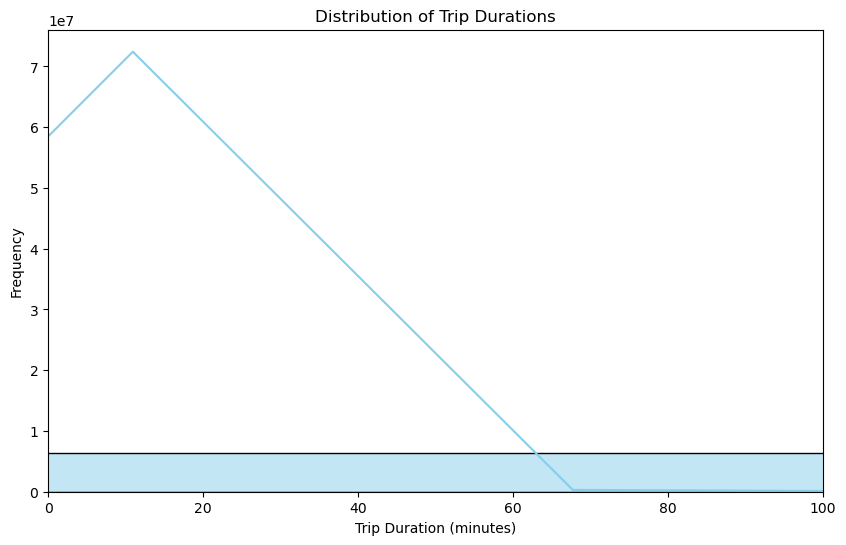

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Trip Durations")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Adjust the range to exclude extreme outliers
plt.show()


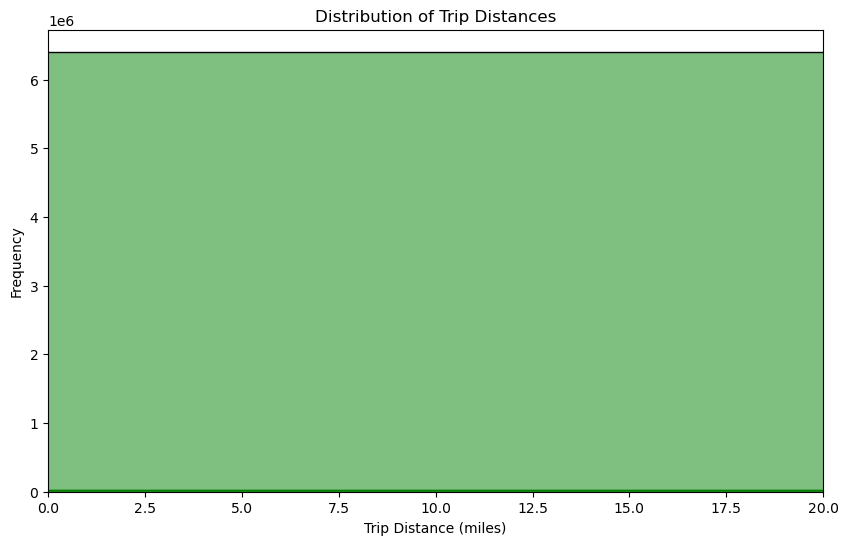

In [37]:
# Plot the distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='green')
plt.title("Distribution of Trip Distances")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 20)  # Adjust the range to exclude extreme outliers
plt.show()


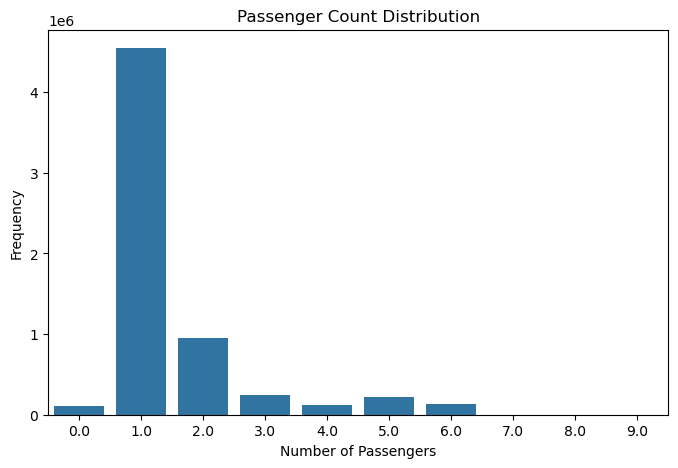

In [41]:
# Plot passenger count distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='passenger_count')
plt.title("Passenger Count Distribution")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()


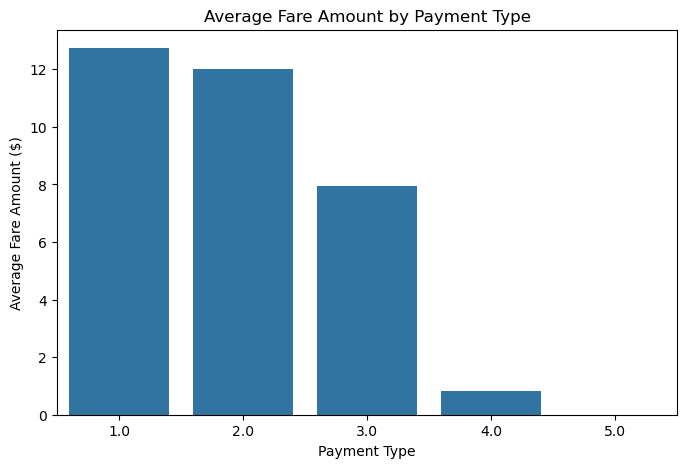

In [45]:
avg_fare_by_payment = df.groupby('payment_type')['fare_amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_by_payment, x='payment_type', y='fare_amount')
plt.title("Average Fare Amount by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Fare Amount ($)")
plt.show()
# how the hektor am i supposed to know which number represents what 